In [178]:
#load libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist


In [179]:
#Download the dataset
((train_data, train_labels),(test_data, test_labels)) = mnist.load_data()

In [180]:
train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)  
test_data = test_data/np.float32(255)
test_labels = test_labels.astype(np.int32)


In [181]:
train_labels[0]

5

In [182]:
#Creating the model

model = K.Sequential([
                      Flatten(input_shape=(28, 28)),  # The flatten, flatten the input from 28 by 28 to 784
                      Dense(128,  activation='relu'),
                      #Dense(64,  activation='relu'),
                      Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [183]:
#model.compile(optimizer='adam',
 #             loss='binary_crossentropy',
 #             metrics=['accuracy'])

In [184]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [185]:
history = model.fit(tf.expand_dims(train_data, axis=-1),y=train_labels, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1500/1500 [==============================] - 5s 3ms/step - loss: 0.2877 - accuracy: 0.9173 - val_loss: 0.1552 - val_accuracy: 0.9563
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1285 - accuracy: 0.9622 - val_loss: 0.1164 - val_accuracy: 0.9660
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0885 - accuracy: 0.9739 - val_loss: 0.1005 - val_accuracy: 0.9700
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0675 - accuracy: 0.9798 - val_loss: 0.0988 - val_accuracy: 0.9700
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0505 - accuracy: 0.9842 - val_loss: 0.0906 - val_accuracy: 0.9734
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0407 - accuracy: 0.9880 - val_loss: 0.1052 - val_accuracy: 0.9701
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0314 - accuracy: 0.9900 - val_loss: 0.0935 - val_accuracy: 0.9744
Epo

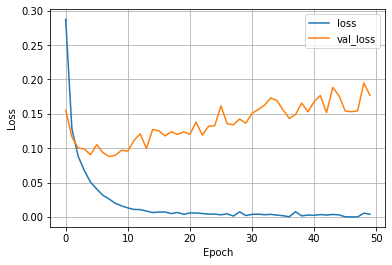

In [186]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [187]:
from sklearn.metrics import classification_report, confusion_matrix

In [188]:
predictions = model.predict(test_data)

313/313 [==============================] - 1s 1ms/step


In [189]:
print(model.metrics_names)
print(model.evaluate(test_data, test_labels))

['loss', 'accuracy']
313/313 [==============================] - 1s 3ms/step - loss: 0.1665 - accuracy: 0.9784
[0.16650541126728058, 0.9783999919891357]


In [193]:
predicted = np.argmax(predictions,1)



In [194]:
print(classification_report(test_labels, predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [195]:
import seaborn as sns

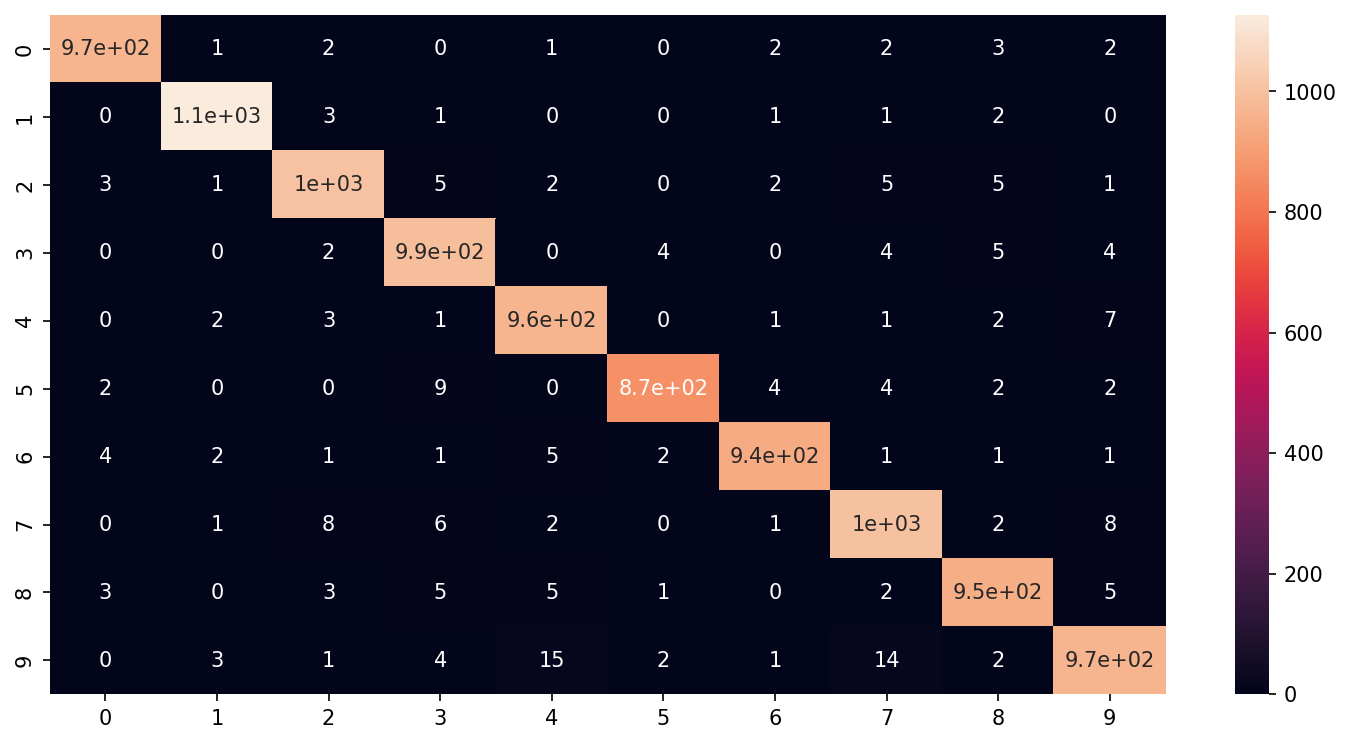

In [196]:
plt.figure(figsize=(12, 6), dpi=150)
sns.heatmap(confusion_matrix(test_labels, predicted),annot=True)

In [197]:
train_data[0].shape

(28, 28)

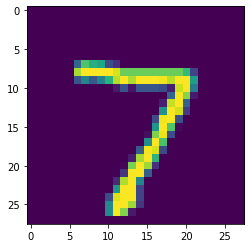

In [198]:
my_number = test_data[0]

plt.imshow(my_number.reshape(28,28))

In [199]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Pred {} Conf: {:2.0f}% True ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

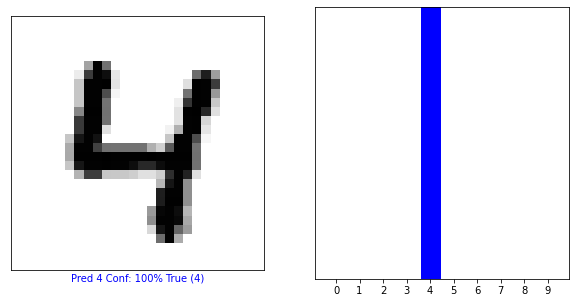

In [200]:
i = 56
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

313/313 [==============================] - 1s 2ms/step


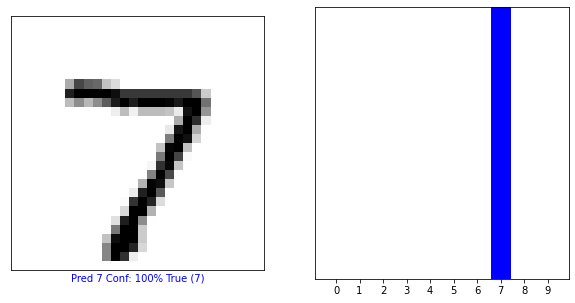

In [201]:
predictions = model.predict(test_data)
i = 0
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()